<a href="https://colab.research.google.com/github/mskrta/Attempted-Rayleigh-Benard-Convection-Simulation/blob/main/Classical_Mechanics_Project_Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Rayleigh Benard Convection

Rayleigh Benard Convection is the process that explains the behavior of a fluid subject to gravity, a heat source positioned at the top of the system held at a constant temperature, and a cold source positioned at the bottom of the system held at a constant temperature. This is the most simple model that atmospheric scientists developed to try to explain the dynamics of the atmosphere. As an interesting side note, Edward Lorenz, in an attempt to study the equations governing Rayleigh Benard Convection, derived a set of equations (now known as the Lorenz Equations) that he would later discover to exhibit chaotic behavior, giving birth to the field of physics/mathematics known as Chaos Theory.  

To understand Rayleigh Benard Convection, we must first take a look at some fundamental fluid dynamics. The subject is notoriously difficult, as will become evident in a short while. What makes fluid dynamics so difficult are the partial differential equations governing the behavior of a fluid system. These equations are known as the **Navier-Stokes Equations** and take the following form:

 $\textbf{Continuity equation:}
\nabla \cdot  \mathbf{u} = 0$

$ \textbf{Momentum equation:}
\rho \left( \frac{\partial \mathbf{u}}{\partial t} + (\mathbf{u} \cdot \nabla) \mathbf{u} \right) = -\nabla p + \rho\upsilon \nabla^2 \mathbf{u} + \rho\mathbf{g}$

Where $\rho$ is fluid density, **u** is the velocity vector, *p* is pressure, $\upsilon$ is viscosity, and **g** is gravity. The equations above only pertain to incompressible fluid flow, meaning that the density of the fluid does not change.

For Rayleigh Benard Convection, we must also look at the flow of heat through the system. This is described by the **Advection-Diffusion Equation**:

$\frac{\partial T}{\partial t} + \mathbf{u} \cdot \nabla T = \kappa \nabla^2 T$

Where T is temperature, **u** is the velocity vector, and $\kappa$ is the thermal diffusivity of the liquid.

Solving these equations directly would be a nightmare because **u** is vector-valued. It is much simpler to rewrite these equations in terms of scalar quantities. So, it is convenient to define the **stream function** $\psi$ and the **vorticity** $\omega$ as follows:

$\mathbf{u}= \nabla\times\psi,\quad \omega = \nabla\times\mathbf{u}$

The vorticity is a measure of how much the fluid is rotating about a point. The stream function only converts the velocity vector **u** into a scalar quantity. When substitutions are made and some derivations are done, we can convert the equations above into the following system of equations that govern Rayleigh Benard Convection:

$ \textbf{Vorticity Equation (Momentum):} $

$\frac{\partial \omega}{\partial t} + \frac{\partial \psi}{\partial y} \frac{\partial \omega}{\partial x} - \frac{\partial \psi}{\partial x} \frac{\partial \omega}{\partial y} = \nu \nabla^2 \omega$


$\textbf{Stream Function Equation (Incompressibility):}$

$ \omega = -\nabla^2 \psi$

$\textbf{Velocity Vector Field:}$

$\mathbf{u}= \nabla\times\psi$

$ \textbf{Temperature Equation:} $

$\frac{\partial T}{\partial t} + \frac{\partial \psi}{\partial y} \frac{\partial T}{\partial x} - \frac{\partial \psi}{\partial x} \frac{\partial T}{\partial y} = \kappa \nabla^2 T$

This system of four partial differential equations is what this program aims to simulate.




Calling Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import random

Defines the Initial Conditions for $\psi$, $\omega$, and T.

In [ ]:
#Initialize Grid
N = 22 #Should be whatever value you actually want + 1
V = np.zeros((N,N-2), dtype=[('x', 'i4'), ('y', 'i4')]) #Velocity Vector Field
u = np.zeros((N,N-2)) #stream function
w = np.zeros((N,N-2)) #vorticity
T = np.zeros((N,N-2)) #Temperature

T_top = 400
T_bottom = 10
T_avg = (T_top+T_bottom)/2
T[2][:] = T_top
T[-3][:] = T_bottom
T[3:-3][:] = T_avg
#print(V)
#step-sizes and other constants
dl = 0.5
v = 0.5471/1 #Viscosity of water divided by the density of water
dt = dl**2/v #dt = dl**2/v at the maximum in order for convergence to occur
a = 210*10e-6 #For water, themral expansion coefficient
k = .17*10e-1 #For water, thermal diffusivity
g = 9.8

Calculations. Animation shows the diffusion of heat over the course of time.

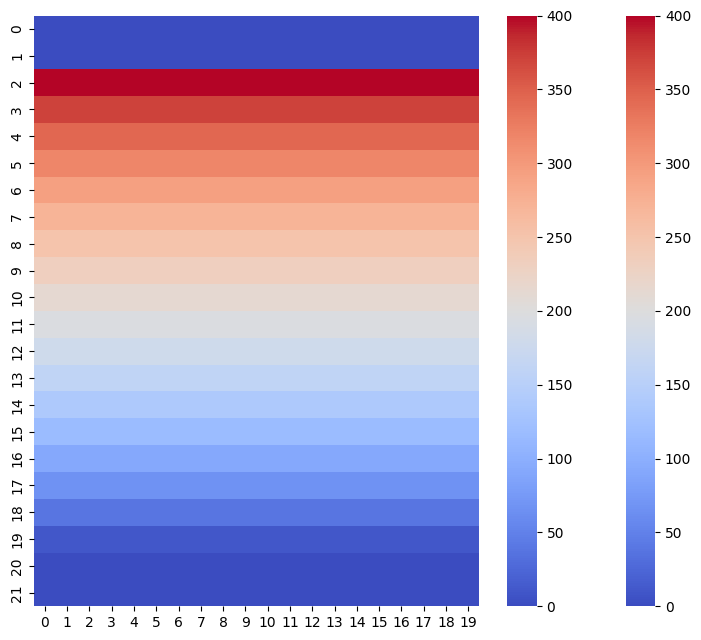

In [ ]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [7.50, 6.50]
plt.rcParams["figure.autolayout"] = True
def init():
    # Create a heatmap with all zeros for the initial state
    # Set vmax to 0.8 to match the color scale of the animation frames
    # Disable the colorbar for the initial state
    sns.heatmap(T, cbar=True, cmap='coolwarm', vmax = np.amax(T))

def animate(i):
  V_copy = V.copy()
  w_copy = w.copy()
  u_copy = u.copy()
  T_copy = T.copy()
  #Vorticity Method to Solve N-S Equations
  #Modified Lax-Wendroff Method
  for i in range(2,N-2):
    for j in range(0,N):

        if j >= N-5:
          j = j-N
        V[i,j+1][0] = 1/(0.5*dl)*(u_copy[i+1,j+2]-u_copy[i,j])
        V[i,j+1][1] = -1/(0.5*dl)*(u_copy[i+1,j+1]-u_copy[i-1,j+1])
        w[i,j+1] = 0.25*(w_copy[i,j]+w_copy[i+1,j+1]+w_copy[i,j+2]+w_copy[i-1,j+1])-0.25*dt/dl*V[i,j+1][0]*(w_copy[i+1,j+1]-w_copy[i-1,j+1])-0.25*dt/dl*V[i,j+1][1]*(w_copy[i,j+2]-w[i,j])

        V[i,j-1][0] = 1/(0.5*dl)*(u_copy[i+1,j]-u_copy[i,j-1])
        V[i,j-1][1] = -1/(0.5*dl)*(u_copy[i+1,j-1]-u_copy[i-1,j-1])
        w[i,j-1] = 0.25*(w_copy[i,j-1]+w_copy[i+1,j-1]+w_copy[i,j]+w_copy[i-1,j-1])-0.25*dt/dl*V[i,j-1][0]*(w_copy[i+1,j-1]-w_copy[i-1,j-1])-0.25*dt/dl*V[i,j-1][1]*(w_copy[i,j]-w[i,j-2])

        V[i+1,j][0] = 1/(0.5*dl)*(u_copy[i+2,j+1]-u_copy[i+1,j-1])
        V[i+1,j][1] = -1/(0.5*dl)*(u_copy[i+2,j]-u_copy[i,j])
        w[i+1,j] = 0.25*(w_copy[i+1,j-1]+w_copy[i+2,j]+w_copy[i+1,j+1]+w_copy[i,j])-0.25*dt/dl*V[i+1,j][0]*(w_copy[i+2,j]-w_copy[i,j])-0.25*dt/dl*V[i+1,j][1]*(w_copy[i+1,j+1]-w[i+1,j-1])

        V[i-1,j][0] = 1/(0.5*dl)*(u_copy[i,j+1]-u_copy[i-1,j-1])
        V[i-1,j][1] = -1/(0.5*dl)*(u_copy[i,j]-u_copy[i-2,j])
        w[i-1,j] = 0.25*(w_copy[i-1,j-1]+w_copy[i,j]+w_copy[i-1,j+1]+w_copy[i-2,j])-0.25*dt/dl*V[i-1,j][0]*(w_copy[i,j]-w_copy[i-2,j])-0.25*dt/dl*V[i-1,j][1]*(w_copy[i-1,j+1]-w[i-1,j-1])

        u[i+1,j] = 0.25*(w[i+1,j]*dl**2+u_copy[i+2,j-1]+u_copy[i+2,j+1]+u_copy[i,j-1]+u_copy[i,j+1])
        u[i-1,j] = 0.25*(w[i-1,j]*dl**2+u_copy[i,j-1]+u_copy[i,j+1]+u_copy[i-2,j-1]+u_copy[i-2,j+1])
        u[i,j+1] = 0.25*(w[i,j+1]*dl**2+u_copy[i+1,j]+u_copy[i+1,j+2]+u_copy[i-1,j]+u_copy[i-1,j+2])
        u[i,j-1] = 0.25*(w[i,j-1]*dl**2+u_copy[i+1,j-2]+u_copy[i+1,j]+u_copy[i-1,j-2]+u_copy[i-1,j])

        V[i,j][0] = 1/(0.5*dl)*(u[i,j+1]-u[i,j-1])
        V[i,j][1] = -1/(0.5*dl)*(u[i+1,j]-u[i-1,j])
        w[i,j] = w_copy[i,j] - dt/(0.5*dl)*V[i,j][0]*(w[i+1,j]-w[i-1,j]) - dt/(0.5*dl)*V[i,j][1]*(w[i,j+1]-w[i,j-1]) + v*dt/(2*dl**2)*(w[i+1,j-1]+w[i-1,j-1]+w[i-1,j+1]+w[i+1,j+1]-4*w_copy[i,j])

        #Calculate T using standard finite difference method. Forward difference for time derivative. Central difference for spacial derivatives.
        if i == 2 or i == N-3:
          T[i,j] = T_copy[i,j]
        else:
          T[i,j] = T_copy[i,j] + (dt/dl**2)*((u_copy[i+1,j]-u_copy[i-1,j])*(T_copy[i,j+1]-T_copy[i,j-1])-(u_copy[i,j+1]-u_copy[i,j-1])*(T_copy[i+1,j]-T_copy[i-1,j])+0.5*k*(T_copy[i+1,j]+T_copy[i,j-1]+T_copy[i-1,j]+T_copy[i,j-1]-4*T_copy[i,j]))

  sns.heatmap(T, cmap='coolwarm', vmax = np.amax(T), cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, repeat=False)
HTML(anim.to_jshtml())

The above animation shows the temperature of the fluid evolving over time. The temperatures at the boundary are arbitrarily set to 400 on the top and 10 at the bottom. You may notice that the top and bottom of the plot are fixed at 0 for all quantities. These are to help define quantities along the real boundaries. They do not affect the problem otherwise. The thermal conductivity of the liquid has been modified so that heat diffusives quickly through the liquid.

One thing that can be noticed from the animation is that the temperature appears to be behaving as if it is a solid (i.e. the heat is diffusing evenly through the matter) and not as a fluid. The initial conditions set all motion of the water (the vector field, the vorticity, etc.) to zero. In this case, the heat flowing through the water should have caused the water to start moving in a circular pattern eventually, but the Navier Stokes equations I used to model the system did not have a component of temperature in them. Looking back, the $\rho$**g** component in the momentum equation ought to contain the temperature dependence. In future work, this would be adjusted.